In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import files
uploaded=files.upload() #Upload file

Saving bank-full.csv to bank-full.csv


In [3]:
data=pd.read_csv("bank-full.csv",header=0,sep=';') #  Read files
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.head().T #All col name

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.shape

(45211, 17)

## No of unique Values

In [8]:
len(data['job'].unique())

12

In [9]:
len(data['marital'].unique())

3

In [10]:
len(data['education'].unique())

4

In [11]:
len(data['contact'].unique())

3

In [12]:
len(data['poutcome'].unique())

4

In [13]:
len(data['month'].unique())

12

In [14]:
len(data['default'].unique())

2

In [15]:
len(data['housing'].unique())

2

In [16]:
len(data['loan'].unique())

2

In [17]:
len(data['y'].unique())

2

## Delete col

In [23]:
data.drop(["education","contact","poutcome","month","marital","job"],
          axis=1,inplace=True)

In [24]:
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
day,5,5,5,5,5
duration,261,151,76,92,198
campaign,1,1,1,1,1
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0


## Creating Dummy colum

In [25]:
#Creating dummy variable for Weather column
data=pd.get_dummies(data,columns=['default','housing','loan','y'])

In [26]:
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
balance,2143,29,2,1506,1
day,5,5,5,5,5
duration,261,151,76,92,198
campaign,1,1,1,1,1
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
default_no,1,1,1,1,1
default_yes,0,0,0,0,0
housing_no,0,0,0,0,1


In [27]:
#Shape of the data set
data.shape

(45211, 15)

In [ ]:
# Dividing our data into input and output variables 
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          45211 non-null  int64
 1   balance      45211 non-null  int64
 2   day          45211 non-null  int64
 3   duration     45211 non-null  int64
 4   campaign     45211 non-null  int64
 5   pdays        45211 non-null  int64
 6   previous     45211 non-null  int64
 7   default_no   45211 non-null  uint8
 8   default_yes  45211 non-null  uint8
 9   housing_no   45211 non-null  uint8
 10  housing_yes  45211 non-null  uint8
 11  loan_no      45211 non-null  uint8
 12  loan_yes     45211 non-null  uint8
 13  y_no         45211 non-null  uint8
 14  y_yes        45211 non-null  uint8
dtypes: int64(7), uint8(8)
memory usage: 2.8 MB


## Model Building

In [29]:
# Dividing our data into input and output variables
x=pd.concat([data.iloc[:,0:6],data.iloc[:,7:]],axis=1)
y=data.iloc[:,10]

In [30]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Predicting Model

In [31]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [32]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


## Confusion Matrix

In [33]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[20079,     2],
       [    0, 25130]])

In [34]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(20079+25130)/(20079+2+0+25130)

0.9999557629780363

In [35]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1]

array([9.98021938e-01, 9.99571285e-01, 9.99876397e-01, ...,
       3.87524019e-06, 5.29292515e-05, 1.04483484e-03])

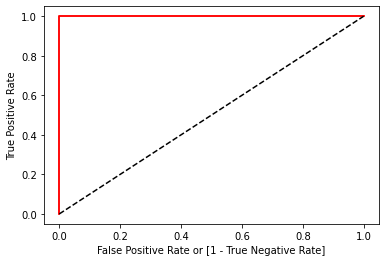

auc accuracy: 0.999950201683183


In [36]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

## AUC = 0.999